In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(108)
%matplotlib inline

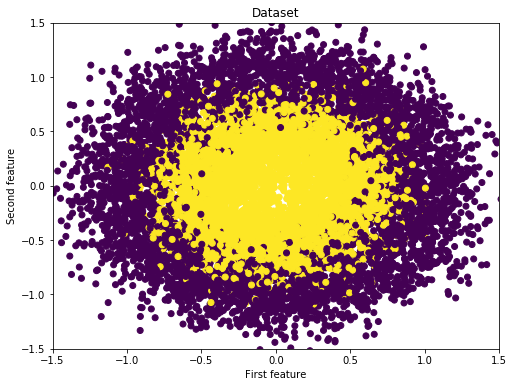

In [34]:
X, y = make_circles(n_samples=10000, factor=0.5, noise=.2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()


In [35]:
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (7500, 2)
Shape y_train: (7500, 1)
Shape X_test: (2500, 2)
Shape y_test: (2500, 1)


In [36]:
class NeuralNet():
    def __init__(self, n_inputs, n_hidden, n_outputs):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden
        
        self.W_h = np.random.randn(self.n_inputs, self.hidden)
        self.b_h = np.zeros((1, self.hidden))
        self.W_o = np.random.randn(self.hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))
        
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def forward_pass(self, X):
        
        A_h = np.dot(X,self.W_h)+self.b_h
        O_h = np.tanh(A_h)
        
        A_o = np.dot(O_h,self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)
        
        outputs = {
            "A_h":A_h,
            "A_o":A_o,
            "O_h":O_h,
            "O_o":O_o,
        }
        return outputs
    
    def cost(self, y_true,y_predict,n_samples):
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost
    
    def backward_pass(self, X, Y, n_samples, outputs):
        
        dA_o = (outputs["O_o"] - Y)
        dW_o = (1/n_samples) * np.dot(outputs["O_h"].T,dA_o)
        db_o = (1/n_samples) * np.sum(dA_o)
        
        dA_h = (np.dot(dA_o, self.W_o.T)) * (1 - np.power(outputs["O_h"], 2))
        dW_h = (1 / n_samples) * np.dot(X.T, dA_h)
        db_h = (1 / n_samples) * np.sum(dA_h)

        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }

        return gradients
    
    def update_weights(self, gradients, eta):
        """
        Updates the model parameters using a fixed learning rate
        """
        self.W_o = self.W_o - eta * gradients["dW_o"]
        self.W_h = self.W_h - eta * gradients["dW_h"]
        self.b_o = self.b_o - eta * gradients["db_o"]
        self.b_h = self.b_h - eta * gradients["db_h"]
    
    def train(self, X, y, n_iters=500, eta=0.3):
        """
        Trains the neural net on the given input data
        """
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs["O_o"], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)

            if i % 500 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')

            self.update_weights(gradients, eta)

    
    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]

        return np.array(y_pred)[:, np.newaxis]

In [37]:
nn = NeuralNet(n_inputs=2, n_hidden=10, n_outputs=1)
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')
print()

print("Training:")
nn.train(X_train, y_train, n_iters=5000, eta=0.7)

Shape of weight matrices and bias vectors:
W_h shape: (2, 10)
b_h shape: (1, 10)
W_o shape: (10, 1)
b_o shape: (1, 1)

Training:
Cost at iteration 0: 0.8976
Cost at iteration 500: 0.2635
Cost at iteration 1000: 0.2598
Cost at iteration 1500: 0.2593
Cost at iteration 2000: 0.2591
Cost at iteration 2500: 0.2589
Cost at iteration 3000: 0.2588
Cost at iteration 3500: 0.2586
Cost at iteration 4000: 0.2587
Cost at iteration 4500: 0.2587


In [38]:
n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 89.72 %


In [39]:
X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp = np.ravel(y_predict_temp)

Text(0.5,1,'Decision boundary')

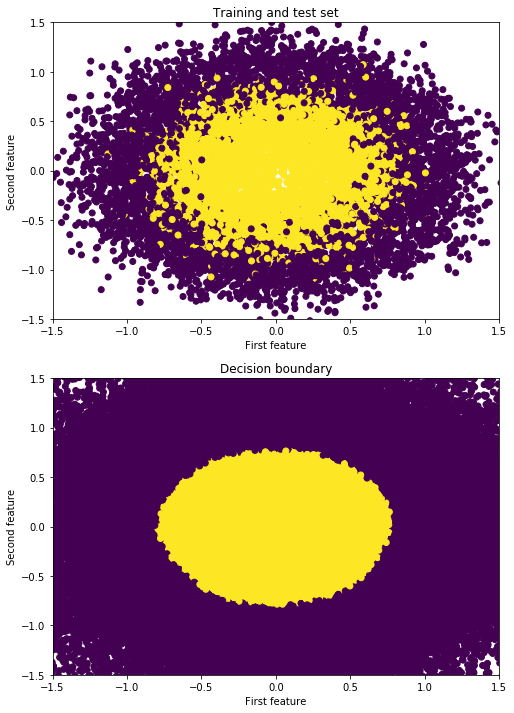

In [40]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")